## Сверточные нейронные сети

Идея создания сверточных нейронных сетей обсуждалась еще в середине XX века. Но к ней вернулись лишь в 2012 году. Тогда математики Алекс Крижевский и Джеффри Хинтон (Нобелевка по физике 2024) представили на международном конкурсе нейросеть AlexNet. По сравнению с аналогичными моделями она совершала почти на 50% меньше ошибок при распознавании изображений: их количество снизилось с 26 до 15%. Сейчас точность стала еще выше. Например, при распознавании лиц в толпе показатель составляет 99,8%

![cnn](./lecture8/cnn.jpg)

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
# Загрузка данных CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

### Размеченные данные - 10 категорий

![table](./lecture8/labels.png)

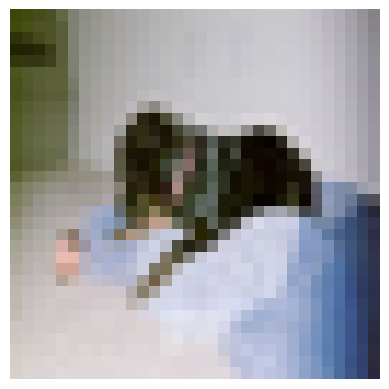

[5]


In [15]:
import numpy as np
n = 1230
plt.imshow(np.array(test_images[n,:,:,:]))
plt.axis('off')  # Turn off axis labels
plt.show()
print(test_labels[n])

In [5]:
# Нормализация пикселей (0-255 -> 0-1)
train_images, test_images = train_images / 255.0, test_images / 255.0

# Создание модели CNN
model = models.Sequential([
    # Свёрточные слои + пулинг
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Полносвязные слои
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 классов для CIFAR-10
])

# Компиляция модели
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Обучение
history = model.fit(
    train_images, train_labels,
    epochs=10,
    validation_data=(test_images, test_labels)
)

# Оценка
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

C:\Users\denis\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/step - accuracy: 0.3245 - loss: 1.8152 - val_accuracy: 0.5405 - val_loss: 1.2900
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.5638 - loss: 1.2392 - val_accuracy: 0.6184 - val_loss: 1.0863
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.6290 - loss: 1.0591 - val_accuracy: 0.6413 - val_loss: 1.0254
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.6641 - loss: 0.9513 - val_accuracy: 0.6618 - val_loss: 0.9598
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.6918 - loss: 0.8751 - val_accuracy: 0.6592 - val_loss: 0.9760
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.7132 - loss: 0.8183 - val_accuracy: 0.6612 - val_loss: 0.9913
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.7321 - loss: 0.7640 - val_accuracy: 0.6907 - val_loss: 0.8853
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.7407 -

### **Формула вычисления Accuracy**  
**Accuracy (точность)** — это одна из основных метрик для оценки качества классификационных моделей в машинном обучении. Она показывает долю правильно предсказанных объектов относительно общего количества предсказаний.  

Accuracy вычисляется по формуле:  

$$
\text{Accuracy} = \frac{\text{Количество верных предсказаний}}{\text{Общее количество предсказаний}} = \frac{TP + TN}{TP + TN + FP + FN}
$$  

Где:  
- **TP (True Positives)** — количество верно предсказанных положительных примеров.  
- **TN (True Negatives)** — количество верно предсказанных отрицательных примеров.  
- **FP (False Positives)** — количество отрицательных примеров, ошибочно предсказанных как положительные.  
- **FN (False Negatives)** — количество положительных примеров, ошибочно предсказанных как отрицательные.


#### **Когда Accuracy полезна, а когда нет?**  
**Хорошо работает**, когда классы сбалансированы (примеров каждого класса примерно поровну).  

**Может вводить в заблуждение**, если классы несбалансированы.  
*Пример:* Если 95% пациентов здоровы, а модель всегда предсказывает "здоров", то Accuracy = 95%, но модель бесполезна для выявления больных.  


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


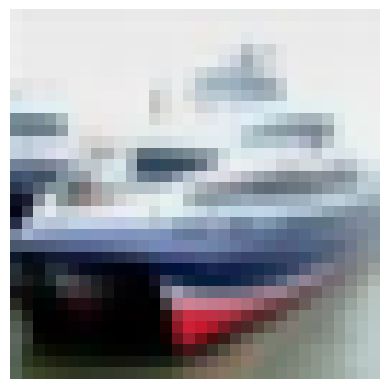

8
[8]


In [21]:
n = 1
distribution = model.predict(test_images[n:n+1,:,:,:])
plt.imshow(np.array(test_images[n,:,:,:]))
plt.axis('off')  # Turn off axis labels
plt.show()
print(np.argmax(distribution))
print(test_labels[n])

## Как работает `Conv2D` в свёрточных нейронных сетях (CNN)?

`Conv2D` — это **свёрточный слой** в нейронных сетях, предназначенный для обработки **двумерных данных** (например, изображений). Он применяет **фильтры (ядра)** к входному тензору, чтобы извлекать локальные признаки (например, края, текстуры, формы).

---

## 1. **Основные параметры `Conv2D`**
В TensorFlow/Keras слой `Conv2D` настраивается так:
```python
tf.keras.layers.Conv2D(
    filters=32,           # Количество фильтров
    kernel_size=(3, 3),   # Размер ядра (высота, ширина)
    strides=(1, 1),       # Шаг свёртки (по умолчанию 1)
    padding='valid',      # 'valid' (без дополнения) или 'same' (с дополнением)
    activation='relu',    # Функция активации (ReLU, sigmoid и др.)
    input_shape=(28,28,1) # Формат входных данных (только для первого слоя)
)
```

---

## 2. **Как происходит свёртка?**
- **Входные данные**: Изображение в виде тензора формы `(height, width, channels)`.  
  Например, `(32, 32, 3)` — изображение 32×32 пикселя с 3 каналами (RGB).  
- **Фильтр (ядро)**: Матрица весов размера `(kernel_size[0], kernel_size[1], input_channels, filters)`.  
  Например, для `kernel_size=(3,3)` и `filters=32` → ядро `(3, 3, 3, 32)` (если входные данные имеют 3 канала).  

### Процесс свёртки:
1. Фильтр "скользит" по изображению с шагом `strides`.  
2. В каждой позиции вычисляется **поэлементное произведение** между частью изображения и ядром, затем результаты суммируются.  
3. К сумме добавляется **смещение (bias)** и применяется **функция активации** (например, ReLU).  

#### Пример (упрощённый):
- **Вход**: Изображение 5×5, 1 канал.  
- **Фильтр**: 3×3, 1 канал.  
- **Результат**: Карта признаков 3×3 (если `padding='valid'`).  

![animation](./lecture8/conv_animation.gif)
---

## 3. **Размер выходного тензора**
Формула для вычисления размера выхода:
$$
\text{output\_size} = \left\lfloor \frac{\text{input\_size} - \text{kernel\_size} + 2 \cdot \text{padding}}{\text{strides}} \right\rfloor + 1
$$

- **Если `padding='valid'`**:  
  - Нет дополнения нулями.  
  - Выход меньше входа.  
  Пример: Вход `(32, 32)`, ядро `(3,3)` → выход `(30, 30)`.  

- **Если `padding='same'`**:  
  - Вход дополняется нулями, чтобы выход был того же размера, что и вход.  
  Пример: Вход `(32, 32)`, ядро `(3,3)` → выход `(32, 32)`.  

---

## 4. **Пример с вычислениями**
**Дано**:  
- Вход: `(5, 5, 1)` (например, чёрно-белое изображение 5×5).  
- Фильтр: 1 ядро `(3, 3, 1)` с весами:  
  $$
  \begin{bmatrix}
  1 & 0 & 1 \\
  0 & 1 & 0 \\
  1 & 0 & 1 \\
  \end{bmatrix}
  $$
- `strides=(1,1)`, `padding='valid'`, активация `ReLU`.  

**Результат свёртки**:  
1. Фильтр применяется к каждому 3×3 участку изображения.  
2. Для участка:
   $$
   \begin{bmatrix}
   1 & 2 & 3 \\
   4 & 5 & 6 \\
   7 & 8 & 9 \\
   \end{bmatrix}
   $$
   вычисляется:  
   $$
   1 \cdot 1 + 2 \cdot 0 + 3 \cdot 1 + 4 \cdot 0 + 5 \cdot 1 + 6 \cdot 0 + 7 \cdot 1 + 8 \cdot 0 + 9 \cdot 1 = 1 + 3 + 5 + 7 + 9 = 25
   $$
3. После `ReLU`: `max(0, 25) = 25`.  

---

## 5. **Визуализация в TensorFlow**
Пример кода для проверки вывода `Conv2D`:
```python
import tensorflow as tf
import numpy as np

# Создаём искусственное изображение 5x5x1
input_image = np.array([[
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25]
]], dtype=np.float32).reshape(1, 5, 5, 1)  # batch=1, height=5, width=5, channels=1

# Создаём слой Conv2D с 1 фильтром 3x3
conv_layer = tf.keras.layers.Conv2D(
    filters=1,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding='valid',
    kernel_initializer=tf.keras.initializers.Constant([[1, 0, 1], [0, 1, 0], [1, 0, 1]]),
    bias_initializer='zeros',
    activation='relu'
)

# Применяем свёртку
output = conv_layer(input_image)
print(output.numpy().squeeze())  # Убираем batch и channel
```
**Вывод**:
```
[[25. 28. 31.]
 [40. 43. 46.]
 [55. 58. 61.]]
```

---

## 6. **Зачем нужны несколько фильтров?**
- Каждый фильтр `Conv2D` обучается выделять **разные признаки**.  
  Например:  
  - Первый фильтр может реагировать на вертикальные края.  
  - Второй — на горизонтальные.  
  - Третий — на диагональные текстуры.  
- Чем глубже слой, тем более сложные признаки обнаруживаются (например, глаза, уши в CNN для распознавания лиц).

---

## Итог
- `Conv2D` **автоматически обучает фильтры** для выделения признаков.  
- **Параметры**:  
  - `filters` — количество ядер,  
  - `kernel_size` — размер ядра,  
  - `strides` и `padding` — контроль размера выхода.  
- **Результат**: 3D-тензор `(new_height, new_width, filters)`.  

Пример из реального мира: В первом слое CNN для CIFAR-10 `Conv2D(32, (3,3))` создаёт 32 карты признаков 30×30 (если вход 32×32 с `padding='valid'`).

### **Как работает `MaxPooling2D` в свёрточных нейронных сетях (CNN)?**

`MaxPooling2D` — это **пулинговый слой** (подвыборка), который уменьшает размерность карт признаков, сохраняя наиболее важную информацию. Он **не обучается** (не имеет весов), а просто применяет операцию максимума к локальным областям входного тензора.

---

## **1. Основные параметры `MaxPooling2D`**
В TensorFlow/Keras слой настраивается так:
```python
tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),  # Размер окна пулинга (высота × ширина)
    strides=None,      # Шаг пулинга (по умолчанию = pool_size)
    padding='valid',   # 'valid' (без дополнения) или 'same' (с дополнением)
)
```
- **`pool_size`**: Размер области, из которой берётся максимум (обычно `(2, 2)` или `(3, 3)`).  
- **`strides`**: Шаг, с которым окно пулинга перемещается по данным. По умолчанию равен `pool_size`.  
- **`padding`**:  
  - `'valid'` — без дополнения нулями (выход меньше входа),  
  - `'same'` — с дополнением (выход того же размера, что и вход).  

---

## **2. Как работает `MaxPooling2D`?**
- **Вход**: 3D-тензор формы `(height, width, channels)`.  
- **Операция**:  
  1. Окно размера `pool_size` скользит по входному тензору с шагом `strides`.  
  2. В каждой позиции выбирается **максимальное значение** из этой области.  
  3. Канал обрабатывается независимо (пулинг применяется к каждому каналу отдельно).  

### **Пример (числовой)**
**Дано**:  
- Входная матрица (1 канал, для простоты):
  \[
  \begin{bmatrix}
  1 & 2 & 3 & 4 \\
  5 & 6 & 7 & 8 \\
  9 & 10 & 11 & 12 \\
  13 & 14 & 15 & 16 \\
  \end{bmatrix}
  \]
- `pool_size=(2, 2)`, `strides=(2, 2)`, `padding='valid'`.

**Шаги**:  
1. Применяем окно 2×2 к левому верхнему углу:
   $$
   \begin{bmatrix}
   1 & 2 \\
   5 & 6 \\
   \end{bmatrix} \rightarrow \max(1, 2, 5, 6) = 6
   $$
2. Сдвигаем окно на `strides=2` вправо:
   $$
   \begin{bmatrix}
   3 & 4 \\
   7 & 8 \\
   \end{bmatrix} \rightarrow \max(3, 4, 7, 8) = 8
   $$
3. Аналогично для нижних строк:
   $$
   \begin{bmatrix}
   9 & 10 \\
   13 & 14 \\
   \end{bmatrix} \rightarrow \max(9, 10, 13, 14) = 14
   $$
   $$
   \begin{bmatrix}
   11 & 12 \\
   15 & 16 \\
   \end{bmatrix} \rightarrow \max(11, 12, 15, 16) = 16
   $$

**Итоговый выход**:
$$
\begin{bmatrix}
6 & 8 \\
14 & 16 \\
\end{bmatrix}
$$

*(Размер уменьшился с 4×4 до 2×2.)*

---

## **3. Визуализация**
<div style="text-align: center;">
    <img src="https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png" width="400" alt="MaxPooling2D Example">
</div>

*(Пример `MaxPooling2D` с `pool_size=(2,2)` и `strides=2`. Источник: Computer Science Wiki)*

---

## **4. Размер выходного тензора**
Формула для вычисления размера выхода:
$$
\text{output\_size} = \left\lfloor \frac{\text{input\_size} - \text{pool\_size}}{\text{strides}} \right\rfloor + 1
$$

- Если `padding='same'`, TensorFlow автоматически дополняет вход нулями, чтобы выход был такого же размера, как вход.  
- Пример:  
  - Вход `(30, 30, 64)`, `pool_size=(2,2)`, `strides=2` → выход `(15, 15, 64)`.  
  - Вход `(31, 31, 64)`, `pool_size=(2,2)`, `strides=2` → выход `(15, 15, 64)` (так как `⌊(31-2)/2⌋ + 1 = 15`).  

---

## **5. Пример кода в TensorFlow**
```python
import tensorflow as tf
import numpy as np

# Создаём искусственный тензор (1 изображение 4x4 с 1 каналом)
input_tensor = np.array([[
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
]], dtype=np.float32).reshape(1, 4, 4, 1)  # (batch=1, height=4, width=4, channels=1)

# Создаём слой MaxPooling2D
max_pool = tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2),
    padding='valid'
)

# Применяем пулинг
output = max_pool(input_tensor)
print(output.numpy().squeeze())  # Убираем batch и channel
```
**Вывод**:
```
[[ 6.  8.]
 [14. 16.]]
```

---

## **6. Зачем нужен `MaxPooling2D`?**
1. **Уменьшение размерности**:  
   - Сокращает объём вычислений в сети.  
   - Уменьшает риск переобучения.  
2. **Инвариантность к малым сдвигам**:  
   - Максимальный элемент в области останется тем же, даже если объект немного сместился.  
3. **Акцентирование важных признаков**:  
   - Сохраняет только самые сильные активации (например, края, текстуры).  

---

## **7. Чем отличается от `AveragePooling2D`?**
| **`MaxPooling2D`**         | **`AveragePooling2D`**       |
|----------------------------|------------------------------|
| Берёт максимум из области  | Берёт среднее из области     |
| Подходит для выделения четких признаков (например, краёв) | Лучше для сглаживания (например, в классических CNN) |

---

## **Итог**
- `MaxPooling2D` **уменьшает размерность** данных, выбирая **максимальные значения** в локальных областях.  
- Основные параметры:  
  - `pool_size` — размер окна (обычно `(2, 2)`),  
  - `strides` — шаг (обычно равен `pool_size`),  
  - `padding` — контролирует размер выхода.  
- Применяется после свёрточных слоёв для снижения вычислительной сложности.  

Пример архитектуры CNN с `MaxPooling2D`:
```python
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2))
])
```